In [23]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import pickle

In [2]:
# Load dataframe median
with open("./median_graph.p", 'rb') as f:  # notice the r instead of w
    median_graph = pickle.load(f)

In [3]:
# Load dataframe median
with open("./graph_2006.p", 'rb') as f:  # notice the r instead of w
    graph_2006 = pickle.load(f)

In [4]:
flipped_dict = {
    "AL": (-86.791130, 32.806671),
    # "AK": (-152.404419, 61.370716),
    "AZ": (-111.431221, 33.729759),
    "AR": (-92.373123, 34.969704),
    "CA": (-119.681564, 36.116203),
    "CO": (-105.311104, 39.059811),
    "CT": (-72.755371, 41.597782),
    "DE": (-75.507141, 39.318523),
    "FL": (-81.686783, 27.766279),
    "GA": (-83.643074, 33.040619),
    # "HI": (-157.498337, 21.094318),
    "ID": (-114.478828, 44.240459),
    "IL": (-88.986137, 40.349457),
    "IN": (-86.258278, 39.849426),
    "IA": (-93.210526, 42.011539),
    "KS": (-96.726486, 38.526600),
    "KY": (-84.670067, 37.668140),
    "LA": (-91.867805, 31.169546),
    "ME": (-69.381927, 44.693947),
    "MD": (-76.802101, 39.063946),
    "MA": (-71.530106, 42.230171),
    "MI": (-84.536095, 43.326618),
    "MN": (-93.900192, 45.694454),
    "MS": (-89.678696, 32.741646),
    "MO": (-92.288368, 38.456085),
    "MT": (-110.454353, 46.921925),
    "NE": (-98.268082, 41.125370),
    "NV": (-117.055374, 38.313515),
    "NH": (-71.563896, 43.452492),
    "NJ": (-74.521011, 40.298904),
    "NM": (-106.248482, 34.840515),
    "NY": (-74.948051, 42.165726),
    "NC": (-79.806419, 35.630066),
    "ND": (-99.784012, 47.528912),
    "OH": (-82.764915, 40.388783),
    "OK": (-96.928917, 35.565342),
    "OR": (-122.070938, 44.572021),
    "PA": (-77.209755, 40.590752),
    "RI": (-71.511780, 41.680893),
    "SC": (-80.945007, 33.856892),
    "SD": (-99.438828, 44.299782),
    "TN": (-86.350493, 35.747845),
    "TX": (-97.563461, 31.054487),
    "UT": (-111.862434, 40.150032),
    "VT": (-72.710686, 44.045876),
    "VA": (-78.169968, 37.769337),
    "WA": (-120.740135, 47.751076),
    "WV": (-80.454903, 38.597626),
    "WI": (-89.616508, 44.268544),
    "WY":  (-107.302490, 42.755966),
    "DC": (-77.007507, 38.900497)
}

In [47]:
louvain = nx.community.louvain_communities(median_graph, seed=42)

In [48]:
louvain

[{'AR', 'LA', 'OK', 'TX'},
 {'IL', 'IN', 'KY', 'MI', 'OH', 'WV'},
 {'DC', 'MD', 'VA'},
 {'KS', 'MO'},
 {'AZ', 'CA', 'CO', 'HI', 'NM', 'NV', 'UT', 'WY'},
 {'DE', 'PA'},
 {'AL', 'FL', 'GA', 'MS', 'NC', 'SC', 'TN'},
 {'AK', 'ID', 'MT', 'OR', 'WA'},
 {'NJ', 'NY'},
 {'MN', 'ND', 'WI'},
 {'IA', 'NE', 'SD'},
 {'CT', 'MA', 'ME', 'NH', 'RI', 'VT'}]

In [27]:
len(louvain)

12

In [31]:
median_graph_copy = median_graph.copy()
median_graph_copy.remove_node("AK")
median_graph_copy.remove_node("HI")
# graph_2006_copy.remove_node("AK")
# graph_2006_copy.remove_node("HI")


In [50]:
louvain_graph_0 = median_graph_copy.subgraph([node for node in median_graph_copy.nodes() if node in louvain[0]])

In [52]:
louvain_graphs = []
for i in range(len(louvain)):
    louvain_graphs.append(median_graph_copy.subgraph([node for node in median_graph_copy.nodes() if node in louvain[i]]))

In [57]:
color_list = [
    '#FF0000', # Red
    '#0000FF', # Blue
    '#008000', # Green
    '#FFFF00', # Yellow
    '#FFA500', # Orange
    '#800080', # Purple
    '#00FFFF', # Cyan
    '#FF00FF', # Magenta
    '#00FF00', # Lime
    '#008080', # Teal
    '#800000', # Maroon
    '#000080', # Navy
    '#808000', # Olive
    '#808080', # Gray
    '#C0C0C0', # Silver
    '#000000', # Black
    '#FFFFFF', # White
]


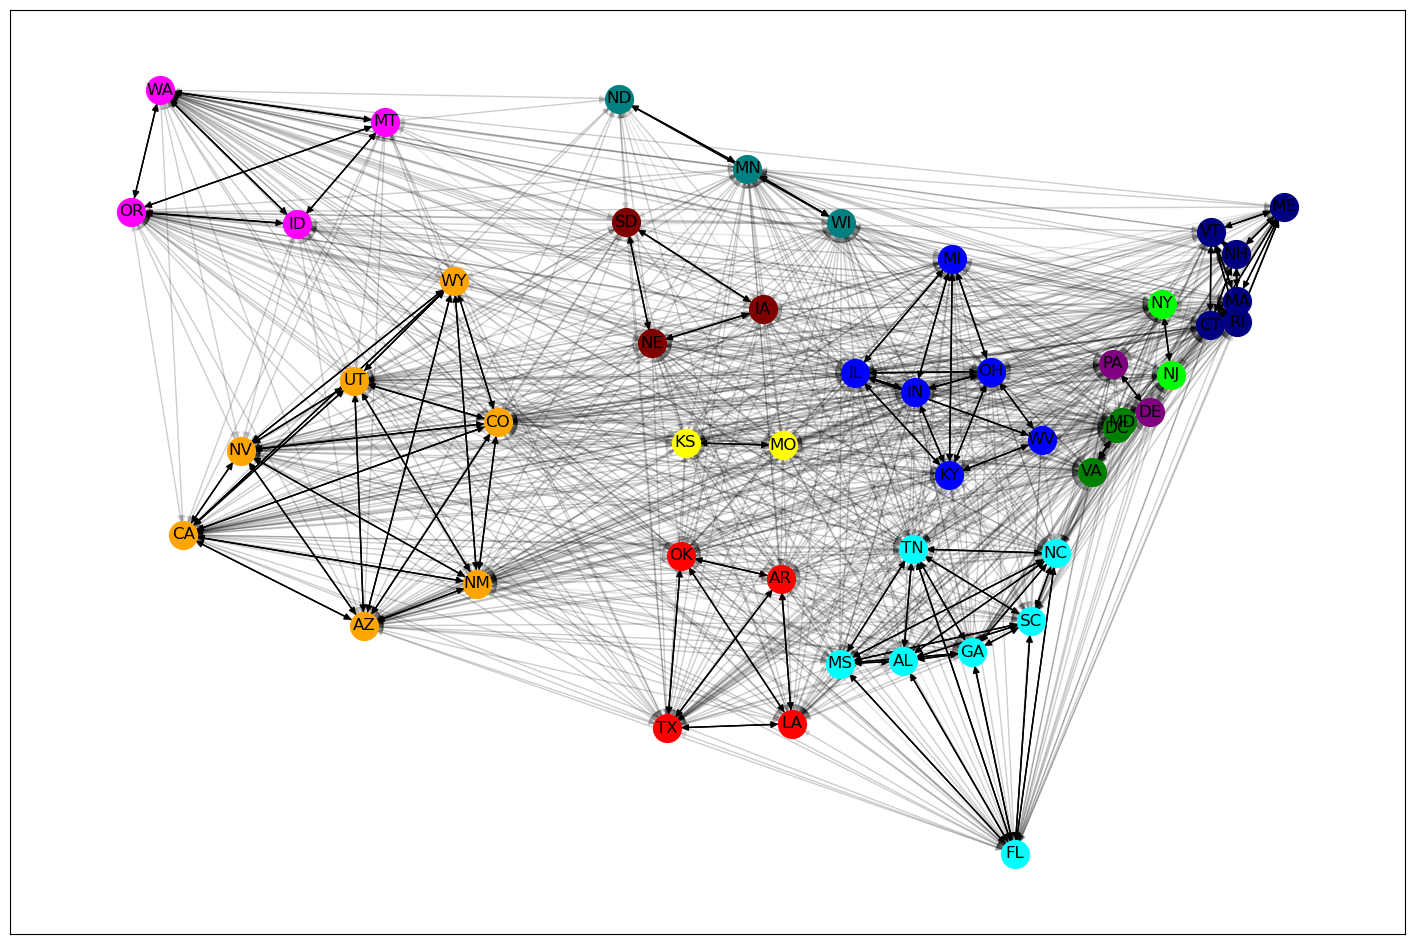

In [61]:
plt.figure(3,figsize=(18,12)) 


for i in range(len(louvain)):
    nx.draw_networkx(louvain_graphs[i], with_labels=True, pos=flipped_dict, node_size=400, node_color=color_list[i])
    # plt.show()

# draw nx edges
nx.draw_networkx_edges(median_graph_copy, pos=flipped_dict, alpha=0.1)
# nx.draw_networkx(louvain_graph_0, with_labels=True, pos=flipped_dict, node_size=400)
plt.show()